In [117]:
#Article # 1 - https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Basics/
import numpy as np

In [118]:
np.random.seed(10)

In [119]:
help(np.random.seed)

Help on built-in function seed:

seed(...) method of numpy.random.mtrand.RandomState instance
    seed(self, seed=None)
    
    Reseed a legacy MT19937 BitGenerator
    
    Notes
    -----
    This is a convenience, legacy function.
    
    The best practice is to **not** reseed a BitGenerator, rather to
    recreate a new one. This method is here for legacy reasons.
    This example demonstrates best practice.
    
    >>> from numpy.random import MT19937
    >>> from numpy.random import RandomState, SeedSequence
    >>> rs = RandomState(MT19937(SeedSequence(123456789)))
    # Later, you want to restart the stream
    >>> rs = RandomState(MT19937(SeedSequence(987654321)))



In [120]:
babies = range(10)

In [121]:
months = np.arange(13)

In [122]:
#months

In [123]:
#help(np.dot)

In [124]:
data = [(month, np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]

In [125]:
#len(data)

In [126]:
#np.random.normal(loc=0, scale=20)

In [127]:
#help(np.random.normal)

In [128]:
month_data = [element[0] for element in data]

In [129]:
weight_data = [element[1] for element in data]

In [130]:
# Created a numpy array from data.
X = np.array(month_data)

In [15]:
X.shape # To extract first value of this tuple let's use X.shape[0]

(130,)

In [16]:
X

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [17]:
X = np.c_[np.ones(X.shape[0]), X]

In [18]:
X

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  5.],
       [ 1.,

In [19]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  See Also
 |  --------
 |  column_stack : Stack 1-D arrays as columns into a 2-D array.
 |  r_ : For more detailed documentation.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
 |  array([[1, 4],
 |         [2, 5],
 |         [3, 6]])
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, ..., 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |     

In [20]:
y = np.array(weight_data)

In [21]:
#Analytical solution for linear regression is - Value of Parameter - ((X^T x X) ^ -1) x X ^ T x y

In [22]:
def ols(X,y):
    xtx = np.dot(X.T, X)
    inverted_xtx = np.linalg.inv(xtx)
    xty = np.dot(X.T, y)
    return np.dot(inverted_xtx, xty)

In [23]:
ols(X,y)

array([97.94349023, 24.68016507])

In [24]:
intercept = ols(X,y)[0]
slope = ols(X,y)[1]

In [25]:
y_pred = [(intercept + (element * slope)) for element in X[:, 1]]

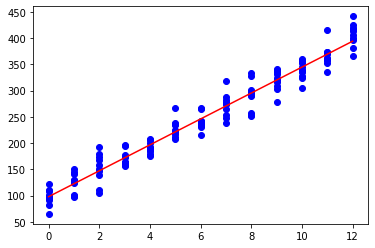

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,1], y, color = 'blue')
plt.plot(X[:,1], y_pred, color = 'red')
plt.show()

In [27]:
X[:,1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.])

In [28]:
len(y)

130

In [29]:
y_pred

[97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 97.94349022705876,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 122.62365529249749,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 147.30382035793622,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 171.98398542337495,
 196.66415048881368,
 196.66415048881368,
 196.66415048881368,
 196.66415048881368,
 196.66415048881368,
 196.66415048881368,
 196.66415048881368,
 196.66415048881368,
 1

In [30]:
X[:,1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.])

# Now let's convert this example into multivariate regression 

In [131]:
gender = np.random.binomial(n=1, p=0.5, size=(len(babies)*len(months)))

In [132]:
help(np.random.binomial)

Help on built-in function binomial:

binomial(...) method of numpy.random.mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``n`` and ``p`` are both scalars.
        Otherwise, 

In [133]:
X = np.c_[X, gender]

In [34]:
X

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  1.],
       [ 1.,  2.,  0.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 1.,  3.,  1.],
       [ 1.,  3.,  1.],
       [ 1.,  4.,  0.],
       [ 1.,  4.

In [35]:
from mpl_toolkits import mplot3d
special_array = np.c_[X,y]
#special_array

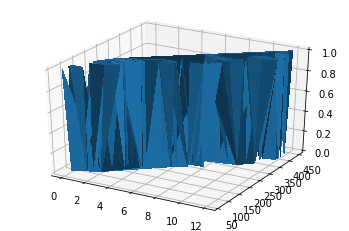

In [36]:
fig = plt.figure()
plt3d = fig.gca(projection='3d')
#plt3d.plot_surface(special_array[:,1], special_array[:,3], special_array[:,2], alpha = 0.2)
plt3d.plot_trisurf(special_array[:,1], special_array[:,3], special_array[:,2], linewidth=0, antialiased=False)
#plt3d.scatter3D(X[:,1], y, X[:,2] )
#plt3d.plot_surface(X[:,1], y, X, alpha = 0.2)

In [37]:
ols(X,y)

array([95.46395681, 24.63320421,  5.6979177 ])

In [38]:
X.shape

(130, 3)

In [39]:
# Article # 2 of the series - https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/

In [40]:
# Define a class to compute metrics
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)  

In [41]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [42]:
from sklearn.linear_model import LinearRegression

X = np.array(month_data).reshape(-1,1)
y = weight_data

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     50253.0180
sst:     1158834.2148
r^2:     0.9566
adj_r^2: 0.9563


In [44]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
       

Text(0, 0.5, 'residuals')

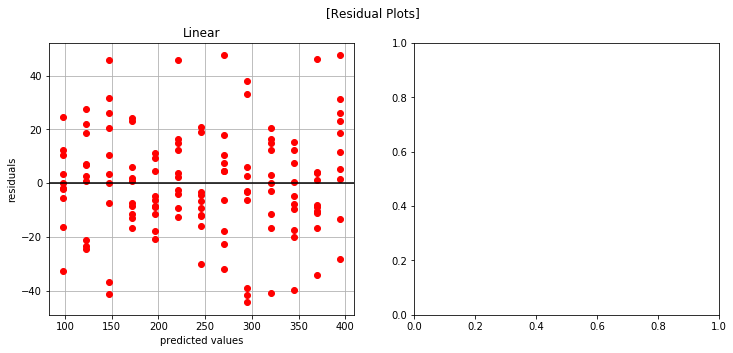

In [52]:
#Trick to plot residual plots -

fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(lr.predict(X), (y - lr.predict(X)), 'ro')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')

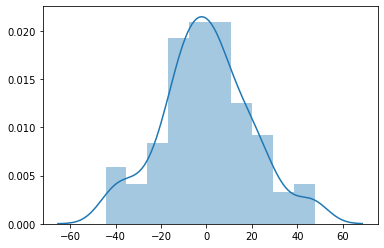

In [53]:
# Plot a histogram to check the normality of residuals of linear regression -

import seaborn as sns
sns.distplot(y - lr.predict(X))

In [55]:
# A scientific method to calculate normality of residuals of linear regression -

from scipy.stats import normaltest
normaltest(y - lr.predict(X))

NormaltestResult(statistic=0.5951300855066888, pvalue=0.7426242793220625)

# https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Assumptions-and-Evaluation/

Things to consider when considering Linear Regression -

1. Linear relation between indepedent and dependent variable. Figure out the variables used in linear regression and should have linear relation with dependent variable(y). If not consider transforming the feature or using a different algorithm altogether.
2. Outlier - See Outlines in action in subsequent cell below -

In [67]:
np.random.seed(20)

In [83]:
X = np.arange(20)
y = [x*2 + np.random.rand(1)*4 for x in range(20)]
y_outlier = y.copy()

[array([3.43050212]),
 array([5.7991161]),
 array([6.24674743]),
 array([6.71512208]),
 array([11.08100773]),
 array([11.96952416]),
 array([14.52501226]),
 array([17.35799169]),
 array([17.84415759]),
 array([19.99176029]),
 array([22.71764447]),
 array([24.60314366]),
 array([25.07518095]),
 array([26.26929867]),
 array([31.08578055]),
 array([31.92393653]),
 array([33.31682563]),
 array([36.04256422]),
 array([37.05451531]),
 array([39.2420462])]

In [103]:
y_outlier[8] = np.array([38]) #inserted amn outlier.

In [104]:
y_outlier

[array([3.43050212]),
 array([5.7991161]),
 array([6.24674743]),
 array([6.71512208]),
 array([11.08100773]),
 array([11.96952416]),
 array([14.52501226]),
 array([17.35799169]),
 array([38]),
 array([19.99176029]),
 array([22.71764447]),
 array([24.60314366]),
 array([25.07518095]),
 array([26.26929867]),
 array([31.08578055]),
 array([31.92393653]),
 array([33.31682563]),
 array([36.04256422]),
 array([37.05451531]),
 array([39.2420462])]

In [105]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [106]:
x_reshape = X.reshape(-1,1)

In [107]:
x_reshape

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [108]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

In [109]:
# fit model w/standard data
linear_nooutlier = LinearRegression()
linear_nooutlier.fit(x_reshape, y);

# fit model w/outlier data
linear_outlier = LinearRegression()
linear_outlier.fit(x_reshape, y_outlier);

In [110]:
stats2 = Stats(x_reshape, y, linear_nooutlier)
pretty_print_stats(stats2)

sse:     13.3182
sst:     2457.1727
r^2:     0.9946
adj_r^2: 0.9943


In [111]:
stats3 = Stats(x_reshape, y_outlier, linear_outlier)
pretty_print_stats(stats3)

sse:     381.9694
sst:     2711.2810
r^2:     0.8591
adj_r^2: 0.8513


In [114]:
y_outlier[8] = np.array([38]) #inserted amn outlier.

In [115]:
y_outlier

[array([3.43050212]),
 array([5.7991161]),
 array([6.24674743]),
 array([6.71512208]),
 array([11.08100773]),
 array([11.96952416]),
 array([14.52501226]),
 array([17.35799169]),
 array([38]),
 array([19.99176029]),
 array([22.71764447]),
 array([24.60314366]),
 array([25.07518095]),
 array([26.26929867]),
 array([31.08578055]),
 array([31.92393653]),
 array([33.31682563]),
 array([36.04256422]),
 array([37.05451531]),
 array([39.2420462])]

# Continuing ...
3. No High-Leverage Points - 
Takeaway
The high-leverage points not only act as outliers, they also greatly affect our model’s ability to generalize and our confidence in the model itself.

Possible Solutions
Explore the data to understand why these data points exist. Are they true data points or mistakes of some kind?
Consider imputing or removing them if outliers, but only if you have good reason to do so!
Consider a more robust loss function (e.g. Huber).
Consider a more robust algorithm (e.g. RANSAC).
4. Homoscedasticity of Error Terms - I have concluded greater the linearity between X and y, greater the homoscedasticity.
5. Unco-related error terms 
6. Indepedent features




array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [134]:
X

array([[ 0,  0],
       [ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  1],
       [ 0,  1],
       [ 0,  0],
       [ 0,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  0],
       [ 1,  0],
       [ 1,  0],
       [ 1,  0],
       [ 1,  0],
       [ 1,  0],
       [ 1,  1],
       [ 1,  1],
       [ 2,  0],
       [ 2,  0],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  1],
       [ 2,  0],
       [ 3,  1],
       [ 3,  0],
       [ 3,  0],
       [ 3,  1],
       [ 3,  0],
       [ 3,  1],
       [ 3,  0],
       [ 3,  0],
       [ 3,  1],
       [ 3,  1],
       [ 4,  0],
       [ 4,  0],
       [ 4,  0],
       [ 4,  0],
       [ 4,  0],
       [ 4,  1],
       [ 4,  0],
       [ 4,  0],
       [ 4,  1],
       [ 4,  0],
       [ 5,  1],
       [ 5,  1],
       [ 5,  0],
       [ 5,  0],
       [ 5,  1],
       [ 5,  1],
       [ 5,  0],
       [ 5,  1],
       [ 5,  0

In [135]:
import pandas as pd
X_df = pd.DataFrame(X)

In [137]:
X_corr = X_df.corr()

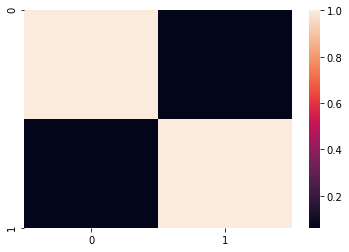

In [138]:
sns.heatmap(X_corr)

In [141]:
X_df.rank()

,0,1
0,5.5,34.0
1,5.5,34.0
2,5.5,99.0
3,5.5,34.0
4,5.5,34.0
...,...,...
125,125.5,99.0
126,125.5,99.0
127,125.5,34.0
128,125.5,34.0


In [144]:
help(pd.DataFrame.rank)

Help on function rank in module pandas.core.generic:

rank(self, axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)
    Compute numerical data ranks (1 through n) along axis.
    
    By default, equal values are assigned a rank that is the average of the
    ranks of those values.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Index to direct ranking.
    method : {'average', 'min', 'max', 'first', 'dense'}, default 'average'
        How to rank the group of records that have the same value
        (i.e. ties):
    
        * average: average rank of the group
        * min: lowest rank in the group
        * max: highest rank in the group
        * first: ranks assigned in order they appear in the array
        * dense: like 'min', but rank always increases by 1 between groups
    numeric_only : bool, optional
        For DataFrame objects, rank only numeric columns if set to True.
    na_option :

In [147]:
# dot product to check whether or not two features are independent. Zero dot product of rank of two features will prove that features are indepent. Larger the dot product, larger the dependency.
# We can also use PCA to detect the dependencies among feature at the cost of losing some interpretability. 
X_df_ranked = X_df.rank()
X_df_ranked[0] @ X_df_ranked[1]

567482.5